<a href="https://colab.research.google.com/github/NMPau/hw/blob/main/%22homework1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1. 

Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1 - орел
# 0 - решка
A = 0
all = []
n=1000000
for w in range(n):
  m1 = np.random.randint(0, 2)
  m2 = np.random.randint(0, 2)
  if m1 != m2:
    A += 1
  el = [m1, m2]
  if el not in all:
    all.append(el)
  else:
    continue

print(A/n, all)

0.50018 [[1, 0], [0, 1], [1, 1], [0, 0]]


Задача 2

Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:

A = {не выпало ни одного герба}

B = {выпало четное число гербов}

C = {на третьей монете выпал герб}

In [ ]:
# 1 - орел
# 0 - решка
A = 0
B = 0
C = 0
all = []
n=1000000
for w in range(n):
  m1 = np.random.randint(0, 2)
  m2 = np.random.randint(0, 2)
  m3 = np.random.randint(0, 2)
  if m1 + m2 + m3 == 0:
    A += 1
  elif m1 + m2 + m3 == 2:
    B +=1
  el = [m1, m2, m3]
  if el[-1] == 1:
    C+=1
  if el not in all:
    all.append(el)
  else:
    continue

print(A/n, B/n, C/n, all)


0.125061 0.375094 0.499923 [[1, 1, 0], [1, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [0, 0, 1], [1, 1, 1], [0, 0, 0]]


Задача 4

Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [40]:
A = 0
B = 0
C = 0
all = []
n=1000000
for w in range(n):
  m1 = np.random.randint(1, 7)
  m2 = np.random.randint(1, 7)
  if m1 == m2 == 6:
    A += 1
  elif (m1 + m2) >= 11:
    B += 1
  elif m1 != 6 and m2 != 6:
    C += 1
  el = [m1, m2]
  if el not in all:
    all.append(el)
  else:
    continue
df = pd.DataFrame(all)
print (A/n, B/n, C/n, df)

0.027809 0.055313 0.694335     0  1
0   2  3
1   1  6
2   4  1
3   3  4
4   2  6
5   5  4
6   6  5
7   4  6
8   2  2
9   5  1
10  1  4
11  6  2
12  1  5
13  5  6
14  3  6
15  3  3
16  3  1
17  3  5
18  6  3
19  4  2
20  1  1
21  5  2
22  5  5
23  4  5
24  1  3
25  6  4
26  3  2
27  4  4
28  6  1
29  2  1
30  5  3
31  4  3
32  2  4
33  1  2
34  2  5
35  6  6


Задача 5

Брошены две игральные кости. Найти вероятность события 

D = {выпала хотя бы одна шестёрка}

In [ ]:
D = 0
all = []
n=1000000
for w in range(n):
  m1 = np.random.randint(1, 7)
  m2 = np.random.randint(1, 7)
  if m1 == 6 or m2 == 6:
    D += 1
  el = [m1, m2]
  if el not in all:
    all.append(el)
  else:
    continue

print (D/n)

0.305475


Задача 7

В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. 

Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [ ]:
# ЧВ, если выиграл 10-1= 9
# P(9) = 1/10
# ЧВ, если не выиграл 0-1= -1
# P(-1) = 9/10
from scipy.stats import bernoulli

In [ ]:
bernoulli_rv = sts.bernoulli(0.1)
bernoulli_rv.rvs(10)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

[]

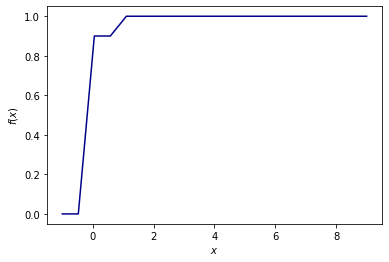

In [ ]:
x = np.linspace(-1,9,20)
cdf = bernoulli_rv.cdf(x) 
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Задача 9

Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.

In [ ]:
koloda = 36
b = np.random.randint(1,10)
c = np.random.randint(10,19)
k = np.random.randint(19,30)
p = np.random.randint(30,39)
el = [b,c,k,p]
karta = np.random.choice(el)
karta
# P(A) = 4/36 * 4/35 - первая 6, вторая 7
# P(AB) = 1/36 * 1/35 - бубновая 6 и бубновая 7
# P(B) = 9/36 * 8/35
# P(A|B) = P(AB)/P(B) 

23

In [ ]:
A = 0
B = 0
all=36
n=36
for w in range(n):
  b = [1,2,3,4,5,6,7,8,9]
  c = [10,11,12,13,14,15,16,17,18]
  k = [19,20,21,22,23,24,25,26,27]
  p = [28,29,30,31,32,33,34,35,36]
  b1 = np.random.choice(b)
  c1 = np.random.choice(c)
  k1 = np.random.choice(k)
  p1 = np.random.choice(p)
  el = [b1,c1,k1,p1]
  karta1 = np.random.choice(el)
  karta2 = np.random.choice(el)
  if (karta1 != karta2) and (karta1 == b[5] or karta1 == c[5] or karta1 == k[5] or karta1 == p[5]):
    A += 1
  elif (karta1 != karta2) and (karta2 == b[6] or karta2 == c[6] or karta2 == k[6] or karta2 == p[6]):
    B += 1
  else:
    continue

print(A/all * B/(all-1))

0.011111111111111112


In [ ]:
from matplotlib.transforms import Bbox
A = 0
B = 0
all=36
n=36
for w in range(n):
  b = [1,2,3,4,5,6,7,8,9]
  c = [10,11,12,13,14,15,16,17,18]
  k = [19,20,21,22,23,24,25,26,27]
  p = [28,29,30,31,32,33,34,35,36]
  b1 = np.random.choice(b)
  c1 = np.random.choice(c)
  k1 = np.random.choice(k)
  p1 = np.random.choice(p)
  el = [b1,c1,k1,p1]
  karta1 = np.random.choice(el)
  karta2 = np.random.choice(el)
  if (karta1 != karta2) and karta1 == b[5]:
    A = 1
  elif (karta1 != karta2) and karta2 == b[6]:
    B = 1
  else:
    continue
    
print(A/all * B/(all-1))

0.0007936507936507937


Задача 6

В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}

In [38]:
all = []
A = 0
B = 0
C = 0
D = 0
n= 100000
for number in range(n):
  n1 = np.random.randint(0, 10)
  n2 = np.random.randint(0, 10)
  n3 = np.random.randint(0, 10)
  if (n1 != n2 and n1 != n3 and n2 != n3):
    A += 1
  if (n1 == n2 and n1 == n3 and n2 == n3):
    B +=1
  if (n1 == n2 or n1 == n3 or n2 == n3):
    C +=1
  if (n1 != n2 or n1 != n3 or n2 != n3):
    D += 1
  nabor = [n1,n2,n3]
  if nabor not in all:
    all.append(nabor)

print('P(A) = ', A/n)
print('P(B) = ', B/n)
print('P(C) = ', C/n)
print('P(D) = ', D/n)
print(len(all))

P(A) =  0.71815
P(B) =  0.01018
P(C) =  0.28185
P(D) =  0.98982
1000
